Version 1.0.1

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [5]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [6]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [7]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
transactions.shape

(2935849, 6)

In [9]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [10]:
items.shape

(22170, 3)

In [11]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [12]:
shops.shape

(60, 2)

In [13]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [14]:
item_categories.shape

(84, 2)

In [15]:
transactions = transactions.merge(items, on="item_id").merge(item_categories, on="item_category_id")

In [16]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [17]:
transactions.date.dtypes

dtype('O')

In [18]:
transactions.dates = pd.to_datetime(transactions.date, format="%d.%m.%Y")

In [19]:
df_sep_2014 = transactions.where((transactions.dates.dt.year==2014)&(transactions.dates.dt.month==9))

In [20]:
df_sep_2014.head

<bound method NDFrame.head of         date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0        NaN             NaN      NaN      NaN         NaN           NaN   
1        NaN             NaN      NaN      NaN         NaN           NaN   
2        NaN             NaN      NaN      NaN         NaN           NaN   
3        NaN             NaN      NaN      NaN         NaN           NaN   
4        NaN             NaN      NaN      NaN         NaN           NaN   
5        NaN             NaN      NaN      NaN         NaN           NaN   
6        NaN             NaN      NaN      NaN         NaN           NaN   
7        NaN             NaN      NaN      NaN         NaN           NaN   
8        NaN             NaN      NaN      NaN         NaN           NaN   
9        NaN             NaN      NaN      NaN         NaN           NaN   
10       NaN             NaN      NaN      NaN         NaN           NaN   
11       NaN             NaN      NaN      NaN         NaN

In [21]:
df_sep_2014["revenue"]=df_sep_2014["item_price"]*df_sep_2014["item_cnt_day"]

In [22]:
df_sep_2014.revenue.groupby(df_sep_2014["shop_id"])

In [23]:
m=df_sep_2014.revenue.groupby(df_sep_2014["shop_id"]).sum().max()
m

7982852.1999999564

In [24]:
m

7982852.1999999564

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [25]:
# YOUR CODE GOES HERE

max_revenue = m# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


In [26]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [27]:
df_sum_2014 = transactions.where((transactions.dates.dt.year==2014)&(transactions.dates.dt.month<9)&(transactions.dates.dt.month>5))

In [28]:
df_sum_2014["revenue"]=df_sum_2014["item_price"]*df_sum_2014["item_cnt_day"]

In [29]:
n= df_sum_2014.revenue.groupby(df_sum_2014.item_category_id).sum().sort_values()

In [30]:
n

item_category_id
51.0         129.00
46.0         511.00
81.0         599.00
66.0         730.00
82.0        1629.00
44.0        2500.00
13.0        4686.00
77.0        7385.00
59.0        9549.00
39.0       37810.70
4.0        38833.20
83.0       52762.00
78.0       55771.00
45.0       90326.50
71.0       93940.25
54.0      128975.00
17.0      167175.00
16.0      191141.00
34.0      248880.00
9.0       291426.84
60.0      327909.00
5.0       418233.10
8.0       433200.00
56.0      493331.10
61.0      698523.80
43.0      708957.20
70.0      820233.65
57.0      850384.80
76.0      904313.00
32.0      979500.00
           ...     
58.0     1813753.20
73.0     1884406.20
62.0     2005028.90
65.0     2015607.90
69.0     2268859.50
29.0     2286658.00
14.0     2337794.30
41.0     2395884.94
38.0     2418047.46
67.0     2418752.20
2.0      2755520.00
22.0     2958475.70
64.0     3340694.95
6.0      3360382.50
35.0     3658967.10
63.0     3921749.95
11.0     4970925.00
15.0     5047875.80
75.

In [31]:
o=20.0

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [32]:
# YOUR CODE GOES HERE

category_id_with_max_revenue = 20.0# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20.0


In [33]:
transactions.shape

(2935849, 9)

<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [34]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [35]:
cc=transactions[["item_id","item_price"]]

In [37]:
cc.shape

(2935849, 2)

In [38]:
cc=cc.drop_duplicates("item_id")

In [39]:
cc.shape

(21807, 2)

In [61]:
pp=(cc.groupby("item_id")["item_price"].std(ddof=0))

In [73]:
pp=(transactions.groupby("item_id")["item_price"].std(ddof=0)==0)

In [74]:
pp.value_counts()

False    15881
True      5926
Name: item_price, dtype: int64

In [75]:
# YOUR CODE GOES HERE

num_items_constant_price = 5926# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


In [78]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [79]:
transactions.shape

(2935849, 9)

In [98]:
qq = transactions[(transactions.shop_id==25)&(transactions.dates.dt.year==2014) & (transactions.dates.dt.month==12)]

In [99]:
qq.shape

(8684, 9)

In [100]:
qq.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
764,31.12.2014,23,25,965,199.33,1.0,28 ДНЕЙ СПУСТЯ (BD),37,Кино - Blu-Ray
765,26.12.2014,23,25,965,230.07,1.0,28 ДНЕЙ СПУСТЯ (BD),37,Кино - Blu-Ray
766,04.12.2014,23,25,965,299.00,1.0,28 ДНЕЙ СПУСТЯ (BD),37,Кино - Blu-Ray
1258,28.12.2014,23,25,21619,405.52,1.0,ЧЕЛОВЕК ДОЖДЯ (BD),37,Кино - Blu-Ray
1259,24.12.2014,23,25,21619,332.66,1.0,ЧЕЛОВЕК ДОЖДЯ (BD),37,Кино - Blu-Ray


In [101]:
qq.shape

(8684, 9)

In [118]:
qq.item_cnt_day.values.sum

12257.0

In [125]:
qq.item_cnt_day.values


array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [133]:
qq.dates=pd.to_datetime(qq.date, format="%d.%m.%Y")

In [138]:
len(qq.dates.dt.day.values)

8684

In [151]:
len(qq.item_cnt_day.values)

8684

In [157]:
days=qq.dates.dt.day.values.sort()

In [168]:
qq.groupby(qq.dates.dt.day)["item_cnt_day"].agg('sum').values

30

In [149]:
len(qq.groupby(qq.dates.dt.day)["item_cnt_day"].agg('sum').values)

30

In [172]:
len(np.arange(1,31))

30

In [184]:
pd.DataFrame(qq.groupby(qq.dates.dt.day)["item_cnt_day"].agg('sum'))

,item_cnt_day
date,
1,153.0
2,169.0
3,195.0
4,164.0
5,300.0
6,350.0
7,325.0
8,209.0
9,204.0


In [195]:
day_seq=transactions[(transactions.shop_id==25)&(transactions.dates.dt.year==2014)&(transactions.dates.dt.month==12)]



day_seq.dates=pd.to_datetime(day_seq.date, format="%d.%m.%Y")
df_items=day_seq.groupby(day_seq.dates.dt.day)['item_cnt_day'].agg('sum')
df_items_var=pd.DataFrame(df_items).var(axis=0,ddof=1)

In [199]:
transactions[(transactions.shop_id==25)&(transactions.dates.dt.year==2014)&(transactions.dates.dt.month==12)].shape

(8684, 9)

In [196]:
df_items_var

item_cnt_day    117167.702299
dtype: float64

In [206]:
day_seq.dates.dt.day.values

array([31, 26,  4, ...,  1, 31, 30])

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

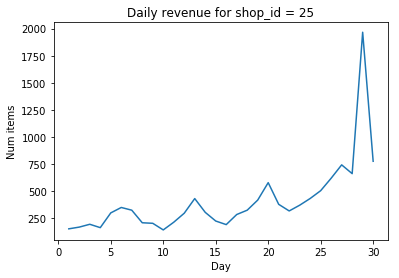

Current answer for task total_num_items_sold_var is: 117167.702299


In [207]:
shop_id = 25

total_num_items_sold = qq.groupby(qq.dates.dt.day)["item_cnt_day"].agg('sum').values
days = np.arange(1,31)

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = 117167.702299
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [208]:
STUDENT_EMAIL = "apratim941208@gmail.com"
STUDENT_TOKEN = "XkemT3GKonOosrXW"
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20.0
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [209]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)